# Analysis_Fifa21

![penguin](https://media.giphy.com/media/12Vujj7Zh7dTPy/giphy.gif)

In [1]:
# Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', 100)

## Overview

In [4]:
# Data analysis plan
# Target variable: predicting a players Overall Rating (ova)
# Investigating the relationship of relevant numerical and categorical data and ova
# Height, Weight because physical characteristics could impacts the ova
# Wage and Value as money valuation of a player could be correlated with ova
# Using a Linear Regression
#BP postistion

# Importing into pandas DataFrame
data = pd.read_csv('fifa21_male2.csv') 
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [5]:
data.shape

(17125, 107)

In [6]:
# Check Columns
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

## Data Cleaning

In [7]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [8]:
for column in data.columns:
    print(column.lower().replace(' ', '_'))

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_&_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [9]:
# Id is unique, so it is used as the Index
data.set_index('id', inplace = True)

### Transformation

In [10]:
#Checking for Data Types
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Columns: 106 entries, name to gender
dtypes: float64(10), int64(44), object(52)
memory usage: 14.0+ MB


name           object
age             int64
ova             int64
nationality    object
club           object
                ...  
cb             object
rcb            object
rb             object
gk             object
gender         object
Length: 106, dtype: object

In [11]:
# Checking categorical columns
cat = data.select_dtypes('object')
cat

,name,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,joined,loan_date_end,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,3 ★,2★,Medium,High,2 ★,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",165lbs,Right,NaN,NaN,€0,€0,€0,2009,3 ★,1★,NaN,NaN,1 ★,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020","Jun 30, 2021",€550K,€2K,€0,"Jun 30, 2021 On Loan",2 ★,2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",NaN,€130K,€3K,€273K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020",NaN,€130K,€2K,€273K,2020 ~ 2022,3 ★,2★,Medium,Medium,1 ★,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2

In [12]:
# Transforming categorical columns into numerical
#height, weight, value, wage
data = data.copy() # Doing a copy of the data

In [13]:
def convert_to_number(s):
    try:
        x = float(s)
    except:
        x = round(float(s.replace("'", '.').replace('"','').replace('lbs','')),0)
    return x



data['weight'] = data['weight'].apply(convert_to_number)
data['height'] = data['height'].apply(convert_to_number)
data.dtypes

name           object
age             int64
ova             int64
nationality    object
club           object
                ...  
cb             object
rcb            object
rb             object
gk             object
gender         object
Length: 106, dtype: object

In [14]:
def convert_to_number(s):
    try:
        x = float(s)
    except:
        x = round(float(s.replace('€', '').replace('K','000').replace('M','000000')),0)
    return x



data['wage'] = data['wage'].apply(convert_to_number)
data['value'] = data['value'].apply(convert_to_number)
data['release_clause'] = data['release_clause'].apply(convert_to_number)
data[['weight', 'height']].dtypes

weight    float64
height    float64
dtype: object

### Removing Data

In [15]:
#Deleting columns that are of no further interest
#player photo, club logo, flag photo...
#loan date end consists almost of only missing values
#gender as all players are males

In [16]:
# Drop columns
data=data.drop(['player_photo', 'flag_photo', 'club_logo', 'club_logo', 'club', 'contract', 'loan_date_end', 'gender'], axis=1)

In [17]:
data=data.drop(['team_&_contract', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'lwb'], axis=1)

In [18]:
data=data.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm'], axis=1)

### Missing values

In [19]:
# Searching for Missing Values
data.isna().sum()

name                  0
age                   0
ova                   0
nationality           0
bov                   0
bp                    0
position            413
pot                   0
height                0
weight                0
foot                  0
growth                0
joined               58
value                 0
wage                  0
release_clause        0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys              58
skill                 0
dribbling             0
curve                58
fk_accuracy           0
long_passing          0
ball_control          0
movement              0
acceleration          0
sprint_speed          0
agility              58
reactions             0
balance              58
power                 0
shot_power            0
jumping              58
stamina               0
strength              0
long_shots            0
mentality             0
aggression      

In [20]:
# Position - filling NANs with 'u' (for Unknown)
data['position'] = data['position'].fillna('u')

In [21]:
# Volleys - use mean for NAN
mean_volleys = data['volleys'].mean()
data['volleys'] = data['volleys'].fillna(mean_volleys)
# Curve - use mean for NAN
mean_curve = data['curve'].mean()
data['curve'] = data['curve'].fillna(mean_curve)
# Agility - use mean for NAN
mean_agility = data['agility'].mean()
data['agility'] = data['agility'].fillna(mean_agility)
# Balance - use mean for NAN
mean_balance = data['balance'].mean()
data['balance'] = data['balance'].fillna(mean_balance)
# Jumping - use mean for NAN
mean_jumping = data['jumping'].mean()
data['jumping'] = data['jumping'].fillna(mean_jumping)
 # Interceptions - use mean for NAN
mean_interceptions = data['interceptions'].mean()
data['interceptions'] = data['interceptions'].fillna(mean_interceptions)
# Positioning - use mean for NAN
mean_positioning = data['positioning'].mean()
data['positioning'] = data['positioning'].fillna(mean_positioning)
# Vision - use mean for NAN
mean_vision = data['vision'].mean()
data['vision'] = data['vision'].fillna(mean_vision)
# Composure - use mean for NAN
mean_composure = data['composure'].mean()
data['composure'] = data['composure'].fillna(mean_composure)
# Sliding Tackle - use mean for NAN
mean_sliding_tackle = data['sliding_tackle'].mean()
data['sliding_tackle'] = data['sliding_tackle'].fillna(mean_sliding_tackle)

## EDA

In [22]:
data.describe().applymap(lambda x: round(x,2)) 

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
count,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,1.712500e+04,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00
mean,25.27,66.97,67.90,72.49,5.75,165.66,5.52,1170566.88,10532.93,6.877516e+05,258.54,51.62,47.96,53.60,60.51,45.01,266.61,57.85,49.57,44.39,54.32,60.64,322.69,65.45,65.44,64.60,62.92,64.72,302.41,59.71,65.17,63.31,65.31,49.14,261.92,57.00,47.09,52.37,55.44,50.25,59.94,141.47,47.25,48.28,46.10,77.61,15.60,15.48,15.47,15.51,15.74,1631.26,361.37,68.09,54.97,58.93,64.21,50.27,64.91
std,4.94,6.86,6.64,5.77,0.45,15.82,5.79,4120541.39,21145.38,3.989630e+06,72.26,17.88,19.39,16.95,13.96,17.70,76.81,18.05,18.16,17.50,14.86,15.87,54.93,14.66,14.44,14.35,9.04,14.01,49.38,13.42,11.90,15.31,12.63,19.04,62.91,17.02,20.84,19.09,13.71,15.70,11.61,61.60,20.18,21.48,21.15,81.14,16.83,16.14,16.00,16.41,17.13,260.36,40.25,11.15,13.88,10.19,9.83,16.85,9.66
min,16.00,38.00,42.00,47.00,5.00,110.00,-1.00,0.00,0.00,0.000000e+00,33.00,6.00,3.00,5.00,7.00,4.00,43.00,5.00,4.00,5.00,9.00,5.00,113.00,12.00,11.00,14.00,24.00,17.00,128.00,12.00,22.00,11.00,16.00,4.00,50.00,9.00,4.00,2.00,10.00,7.00,12.00,17.00,3.00,5.00,6.00,5.00,1.00,1.00,1.00,1.00,1.00,731.00,228.00,25.00,16.00,25.00,28.00,12.00,27.00
25%,21.00,62.00,64.00,69.00,5.00,154.00,0.00,4.00,1000.00,2.000000e+00,232.00,41.00,33.00,46.00,56.00,32.00,232.00,53.00,37.00,32.00,45.00,57.00,294.00,58.00,59.00,57.00,57.00,57.00,272.00,50.00,58.00,56.00,58.00,35.00,235.00,45.00,26.00,43.00,47.00,40.00,53.00,84.00,29.00,28.00,25.00,48.00,8.00,8.00,8.00,8.00,8.00,1492.00,333.00,62.00,46.00,52.00,59.00,35.00,59.00
50%,25.00,67.00,68.00,72.00,6.00,165.00,4.00,275000.00,3000.00,9.000000e+00,271.00,56.00,52.00,57.00,63.00,46.00,279.00,63.00,51.00,43.00,57.00,64.00,331.00,68.00,68.00,67.00,63.00,67.00,308.00,61.00,66.00,66.00,67.00,53.00,269.00,60.00,53.00,57.00,57.00,51.00,60.00,158.00,52.00,55.00,52.00,53.00,11.00,11.00,11.00,11.00,11.00,1659.00,362.00,69.00,58.00,60.00,65.00,53.00,66.00
75%,29.00,72.00,72.00,76.00,6.00,176.00,9.00,650000.00,11000.00,4.710000e+05,306.00,65.00,64.00,65.00,69.00,59.00,319.00,70.00,64.00,58.00,65.00,70.00,360.00,75.00,75.00,75.00,69.00,75.00,339.00,70.00,73.00,73.00,74.00,64.00,304.00,70.00,65.00,66.00,65.00,62.00,68.00,194.00,64.00,66.00,64.00,59.00,14.00,14.00,14.00,14.00,14.00,1812.00,390.00,75.00,65.00,66.00,71.00,64.00,72.00
max,53.00,93.00,93.00,95.00,7.00,243.00,26.00,90000000.00,560000.00,1.610000e+08,437.00,94.00,95.00,93.00,94.00,90.00,470.00,96.00,94.00,94.00,93.00,96.00,464.00,97.00,96.00,96.00,96.00,97.00,444.00,95.00,95.00,97.00,97.00,94.00,421.00,96.00,95.00,96.00,95.00,94.00,96.00,272.00,94.00,93.00,95.00,440.00,90.00,92.00,93.00,93.00,90.00,2316.00,498.00,96.00,93.00,93.00,95.00,91.00,93.00


In [23]:
data.select_dtypes(np.number)

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,6.0,181.0,0,625000.0,7000.0,0.0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
16,37,71,70,71,5.0,143.0,0,600000.0,7000.0,1.0,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
27,33,71,71,71,6.0,161.0,0,1.0,15000.0,0.0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
36,36,68,70,82,5.0,165.0,14,0.0,0.0,0.0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
41,36,81,82,81,6.0,150.0,0,6.0,12000.0,7.0,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,7.0,165.0,5,550000.0,2000.0,0.0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
259090,18,56,58,66,5.0,170.0,10,130000.0,3000.0,273000.0,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
259091,18,56,56,67,6.0,154.0,11,130000.0,2000.0,273000.0,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,63,35,44,52,54,55


In [24]:
correlations = data.corr()
# The correlation between height,weight and ova is weak .02; .15
#between value and ova moderate .37
#strong corr with wage .6

In [25]:
correlations[correlations['ova'] > 0.3]['ova'].sort_values()

movement            0.302267
finishing           0.304012
interceptions       0.305137
heading_accuracy    0.305553
penalties           0.317666
stamina             0.335108
strength            0.338347
positioning         0.339672
def                 0.344906
dribbling           0.350249
volleys             0.360915
fk_accuracy         0.369278
value               0.372578
aggression          0.382813
crossing            0.386334
long_shots          0.390849
curve               0.397320
attacking           0.431238
ball_control        0.431284
skill               0.441689
long_passing        0.482655
sho                 0.487060
short_passing       0.492372
mentality           0.495097
vision              0.505168
age                 0.517099
shot_power          0.534829
phy                 0.543354
power               0.546417
pot                 0.592268
wage                0.592925
total_stats         0.607676
dri                 0.643427
composure           0.693825
pas           

In [26]:
# check the correlations
mask = np.zeros_like(correlations[['weight', 'height', 'ova']])
mask

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [27]:
mask[np.triu_indices_from(mask)] = True 

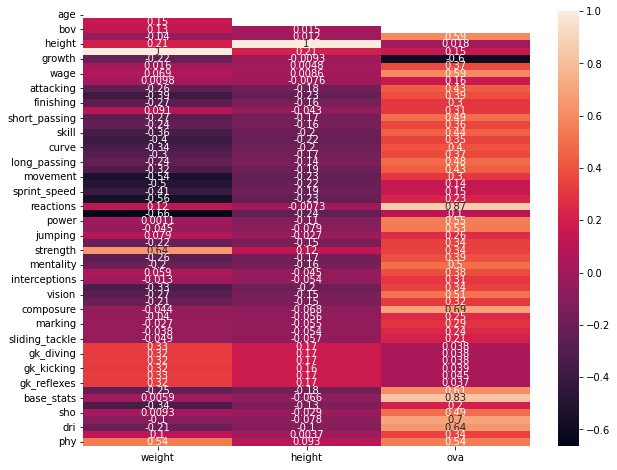

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations[['weight', 'height', 'ova']], mask=mask, annot=True)
plt.show()

In [ ]:
# covariance visualization
sns.pairplot(data)

## Data pre-processing

In [ ]:
def boxcox_transform(df):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [ ]:
data, _ci = boxcox_transform(data)
data

In [ ]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [ ]:
data1 = data.copy()

data1 = remove_outliers(data1, threshold=2, skip_columns=['dob']) 
data1

In [ ]:
data2 = remove_outliers(data1, threshold=1.5, in_columns=['ova'])
data2

In [ ]:
# Defining ova as target variable
# splitting the data

X = data.drop('ova', axis=1)
y = data['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

### Creating the prediction model

In [ ]:
predictions = model.predict(X_test)

In [ ]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

## Results

In [ ]:
predictions = model.predict(X_test)

In [ ]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

In [ ]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['ova'])

In [ ]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

In [ ]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['ova'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

In [ ]:
results.sort_values('resid', ascending=False).head(50)

In [ ]:
results[results['true'] >= 40]

In [ ]:
results.describe()

In [ ]:
sns.regplot(results['true'], results['pred'])

In [ ]:
data['avggift'].corr(df['ova'])

In [ ]:
len(data.index), len(data.index.unique())